In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [244]:
pd.set_option('display.max_row',5000)

In [133]:
train_data = pd.read_csv("D:/Second_Sem/Second_Sem/Self_Prac/MachineHack/houseprice/Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

In [134]:
test_data = pd.read_csv("D:/Second_Sem/Second_Sem/Self_Prac/MachineHack/houseprice/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [135]:
train_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [136]:
train_data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [138]:
#train_data['society'].value_counts()

In [139]:
train_data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [140]:
train_data['size'] = train_data['size'].str.replace('[^0-9]',' ')

In [141]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00


In [142]:
train_data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [143]:
train_data['total_sqft'].value_counts()

1200              843
1100              221
1500              205
2400              196
600               180
1000              172
1350              133
1050              123
1300              117
1250              114
900               112
1400              108
1800              104
1150              101
1600              101
1140               91
2000               83
1450               70
1650               69
800                67
3000               66
1075               66
1020               63
2500               62
1125               60
1550               60
1160               60
950                59
1180               58
1700               58
                 ... 
1000 - 1285         1
615 - 985           1
2710 - 3360         1
1989                1
1316                1
2363                1
888 - 1290          1
616                 1
1502                1
638                 1
2758                1
763 - 805           1
3770                1
2173                1
2501      

In [144]:
train_data['total_sqft']=train_data['total_sqft'].replace({'2830 - 2882':2856,'2249.81 - 4112.19':3181,'1200 - 2400':1800,'3630 - 3800':3715,'4000 - 5249':4624.5,
                                 '524 - 894':709,'613 - 648':630.5,'1804 - 2273':2038.5,'1390 - 1600':1495,'1115 - 1130':1122.5,'1365 - 1700':1532.5,
                                 '1255 - 1350':1302.5,'2580 - 2591':2585.5,'645 - 936':790.5,'142.61Sq. Meter':1535,'1430 - 1630':1530,'620 - 934':777,
                                 '1618 - 1929':1773.5,'381 - 535':458,'1200 - 1800':1500,'3300 - 3335':3317.5,'1446 - 1506':1476,'1410 - 1710':1560,
                                 '850 - 1060':955,'4260 - 4408':4334,'596 - 804':700,'1210 - 1477':1343.5,'1020 - 1130':1075,'1079 - 1183':1131,
                                                          '716Sq. Meter':7706,'3425 -3435':3430,'3307 - 3464':3338,'500Sq. Yards':4500,'4500 - 5540':5020,
                                                          '1000 -1204':1102,'6Acres':261360,'1270 - 1275':1272,'706 - 716':711,'1120 - 1145':1132,'1310 - 1615':1462,
                                                          '1450 - 1950':1700,'1650 - 2538':2094,'1783 - 1878':1830,'1500Cents':653400,'132Sq. Yards':1188,'1450 - 1595':1522,
                                                          '1005.03 - 1252.49':1129, '1564 - 1850':1707,'45Sq. Yards':405,'670 - 980':825,'1482 -1684':1583,'1500 - 2400':1950,'5666 - 5669':5667,
                                                          '633 - 666':650,'1437 - 1629':1533,'1125 - 1500':1312,'4000 - 4450':4225,'4400 - 6640':5520,'3884 - 3550':3517,'315Sq. yards':2835,
                                                          '4050 - 4075':4062,'870 - 1080':975,'1200 - 1470':1335,'700 - 900':800,'1.26Acres':54885.6,'3010 - 3410':3210,'1660 - 1805':1732,
                                                          '300Sq. Yards':3240,'3450 - 3472':3461,'117Sq. Yards':1053,'1469 - 1766':1617,'1255 - 1863':1559,'610 - 615':612,'2Acres':87120,
                                                          '763 - 805':784,'2041 - 2090':2065,'2957 - 3450':3203,'697Sq. Meter':7502,'1574Sq. Yards':14166})

In [145]:
train_data['total_sqft'] = train_data['total_sqft'].replace({'1482 - 1846':1664,'188.89Sq. Yards':1700,'2725 - 3250':2987.5,'1042 - 1105':1073.5,
                                                            '2000 - 5634':3817,'1230 - 1490':1360,'2466 - 2856':2661,'981 - 1249':1115,'840 - 1010':925,
                                                            '1230 - 1290':1260,'1252 - 1375':1313, '1052 - 1322':1187,'1300 - 1405':1352.5,'3090 - 5002':4046,
                                                            '1.25Acres':54450,'854 - 960':907,'84.53Sq. Meter':903,'770 - 841':805.5,'850 - 1093':971.5,'122Sq. Yards':1098,
                                                            '3103 - 3890':3496.5,'3606 - 5091': 3496.5,'3606 - 5091':4348.5,'2462 - 2467':2464.5,'2150 - 2225':2187.5,'361.33Sq. Yards':3252,
                                                            '655 - 742':698,'1925 - 2680':2302,'1400 - 1421':1410,'3067 - 8156':5611,'1160 - 1195':1177,'547.34 - 827.31':687, '2806 - 3019':2912,
                                                            '2710 - 3360': 3035, '605 - 624':614,'1225  - 1495':1355,'2100 - 5405':3752,'1520 - 1740':1630,'34.46Sq. Meter':371,'660 - 780':720,
                                                            '1782 - 2000':1891,'934 - 1437':1185,'942 - 1117':1029,'888 - 1290':1089,'78.03Sq. Meter':840,'1Grounds':2400,'5.31Acres':231303,
                                                            '1100Sq. Meter':11840,'1500Sq. Meter':16145,'3436 - 3643':3539,'620 - 933':776,'204Sq. Meter':2196})

In [146]:
train_data['total_sqft']=train_data['total_sqft'].replace({'86.72Sq. Meter':933.5,'3293 - 5314':4304,'527 - 639':583,'45.06Sq. Meter':485,
                                                          '750 - 800':775,'24Sq. Meter':258,'660 - 670':665,'133.3Sq. Yards':1200,'598 - 958':778,
                                                          '799 - 803':801,'1974 - 2171':2071,'929 - 1078':1003,'704 - 730':717,'712 - 938':825,
                                                          '684 - 810':747,'980 - 1030':1005,'15574Sq. Yards':14166,'580 - 650':615,'1076 - 1199':1137,
                                                          '2470 - 2790': 2630,'120Sq. Yards':1080,'2.09Acres':91040,'629 - 1026':1730,'1100 - 1225':1162,
                                                          '151.11Sq. Yards':460, '800 - 2660':1730,'1145 - 1340': 1242,'1160 - 1315':1237,
                                                          '1408 - 1455':1431.5,'2695 - 2940':2817,'30Acres':1306799,'540 - 740':640,'2650-2990':2820,'4125Perch':1123031,
                                                          '4900 - 4940':4920,'783 - 943': 863,'650 - 665':657,'24Guntha':26135,'1133 - 1384':1258,'755 - 770':762,'385 - 440':412,
                                                          '1510 - 1670':1590,'3369 - 3464':3416, '943 - 1220':1081, '1235 - 1410':1372,'2204 - 2362':2283,'142.84Sq. Meter':1537,
                                                          '1610 - 1880':1745,'2800 - 2870':2835, '1010 - 1300':1155, '1791 - 4000':2895, '1140 - 1250':1195,'1195 - 1440':1317,
                                                          '1000 - 1285':1142,'2100 - 2850':2475, '2940Sq. Yards':21960,'1015 - 1540':1277,'1550 - 1590':1570,'4400 - 6800':5600,
                                                          '1100Sq. Yards':9900,'2563 - 2733':2648, '3Cents':1306,'3500 - 3600':3550,'1250 - 1305':1255,'38Guntha':41381})

In [147]:
train_data['total_sqft'] = train_data['total_sqft'].replace({'2528 - 3188':2858,'884 - 1116':1000,'15Acres':653400,'38Ghunta':41382,'1150-1194':1172,
                                                            '167Sq. Meter':1797,'1070 - 1315':1192,'3508 - 4201':3854,'1360 - 1890':1625,'1750 - 2640':2195,
                                                            '664 - 722':693,'596 - 861':729,'1349 - 3324':2336,'520 - 645':582,'540 - 670':582,'2805 - 3565':3185,
                                                            '1565 - 1595':1580,'660 - 700':680,'1520 - 1759':1640,'2400 - 2600': 2500,'1440 - 1884':1661, '3040Sq. Meter':32722,'1180 - 1630':1405,
                                                            '1574Sq. Meter':14166,'2650 - 2990':2820,'650 - 760':705,'1004 - 1204':1104,'1445 - 1455':1450,'615 - 985':800,
                                                            '3425 - 3435':3430,'3484 - 3550':3517,'2215 - 2475':2345,'1482 - 1684':1583,'1215 - 1495':1355,'1000Sq. Meter':10764,
                                                            '315Sq. Yards':3391,'1255 - 1375':1315,'1150 - 1194':1172,'540 - 565':555})

In [151]:
train_data['total_sqft'] = train_data['total_sqft'].astype(float)

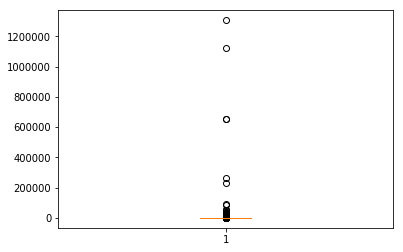

In [152]:
plt.boxplot(train_data['total_sqft'])
plt.show()

In [ ]:
plt.boxplot(train_data['size'])
plt.show()

In [ ]:
## Now Impute the both column 

In [154]:
train_data['size']= train_data['size'].clip_upper(train_data['size'].quantile(0.9)) 
train_data['size']= train_data['size'].clip_lower(train_data['size'].quantile(0.01)) 

TypeError: can't multiply sequence by non-int of type 'float'

In [68]:
train_data['total_sqft'] = train_data['total_sqft'].clip_upper(train_data['total_sqft'].quantile(0.90))
train_data['total_sqft'] = train_data['total_sqft'].clip_lower(train_data['total_sqft'].quantile(.1))

In [107]:
df = train_data.loc[:,['size','price']]
df.head()

,size,price
0,2.0,39.07
1,4.0,120.00
2,3.0,62.00
3,3.0,95.00
4,2.0,51.00


C:\Users\Dhiru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


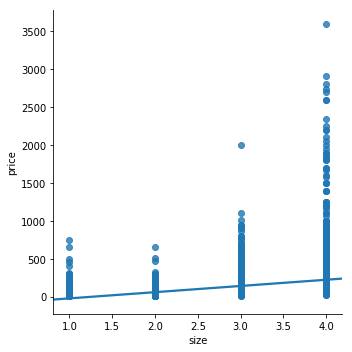

In [109]:
sns.lmplot(x ='size',y ='price',data=df)
plt.show()

In [112]:
df1 = train_data.loc[:,['total_sqft','price']]
df1.head(2)

,total_sqft,price
0,1056.0,39.07
1,2430.0,120.00


C:\Users\Dhiru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


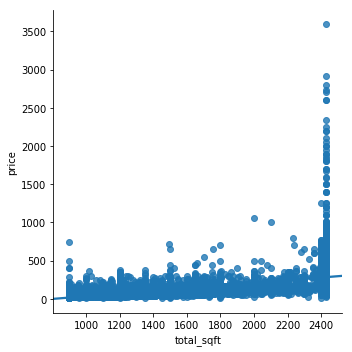

In [114]:
sns.lmplot(x='total_sqft',y='price',data=df1)
plt.show()

In [115]:
df3=train_data.loc[:,['size','total_sqft']]

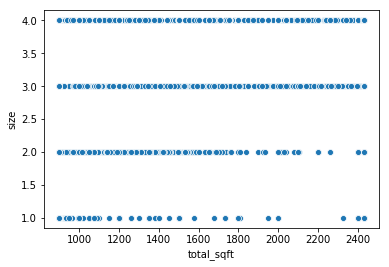

In [117]:
sns.scatterplot(x='size',y='total_sqft',data=df3)
plt.show()

In [110]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,419,2.0,464,1056.0,2.0,1.0,39.07
1,3,11,317,4.0,2439,2430.0,5.0,3.0,120.00


In [15]:
#train_data['size'] = train_data['size'].str.replace('[a-zA-Z]','').head()

In [161]:
def ready(x):
    if x=='18':
        return 1
    elif x=='19':
        return 2
    elif x=='17':
        return 3
    elif x=='20':
        return 4
    elif x=='21':
        return 5
    elif x=='22':
        return 6
    elif x=='14':
        return 7
    elif x=='15':
        return 8
    elif x=='16':
        return 9
    elif x=='14':
        return 10
    elif x=='Re':
        return 11
    elif x=='Im':
        return 12

In [162]:
train_data['availability']=train_data.availability.str[:2].apply(ready)

In [74]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,419,2.0,464,1056.0,2.0,1.0,39.07
1,3,11,317,4.0,2439,2430.0,5.0,3.0,120.00


In [155]:
train_data['bath'].fillna(0,inplace=True)
train_data['balcony'].fillna(0,inplace=True)
train_data['size'].fillna(0,inplace=True)

In [156]:
train_data['society'].fillna(method = 'ffill',inplace=True)
train_data['location'].fillna(method = 'ffill',inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
train_data['location'] = LabelEncoder().fit_transform(train_data['location'].values)

In [23]:
train_data['society'] = LabelEncoder().fit_transform(train_data['society'].values)

In [24]:
train_data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [157]:
train_data['size'] = train_data['size'].astype(int)

In [158]:
train_data['area_type'] = train_data['area_type'].replace({'Super built-up  Area':1})

In [159]:
train_data['area_type'] = train_data['area_type'].replace({'Built-up  Area':2,'Plot  Area':3,'Carpet  Area':4})

In [163]:
train_data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,3,11,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,2,11,Uttarahalli,3,Theanmp,1440.0,2.0,3.0,62.00
3,1,11,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,1,11,Kothanur,2,Soiewre,1200.0,2.0,1.0,51.00


In [30]:
train_data['area_type'].value_counts()

1    8790
2    2418
3    2025
4      87
Name: area_type, dtype: int64

In [31]:
train_data.dtypes

area_type         int64
availability      int64
location          int64
size              int32
society           int64
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,explained_variance_score,mean_squared_error

In [76]:
train,test = train_test_split(train_data,test_size=.3,random_state=100)

In [77]:
train_y = train['price']
test_y = test['price']

train_x = train.drop('price',axis=1)
test_x = test.drop('price',axis=1)

In [78]:
lm = LinearRegression()
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lm_pred  = lm.predict(test_x)
lm_pred[:5]

array([54.25882067, 76.91739624, 34.90637383,  7.56182688, 72.99842676])

In [80]:
lm_mse = mean_squared_error(test_y,lm_pred)
lm_mse

12627.736875838893

In [81]:
rmse_lm = np.sqrt(lm_mse)
rmse_lm

112.3732035488839

In [85]:
r2_lm =r2_score(test_y,lm_pred)
r2_lm

0.37722742733033077

In [83]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [84]:
rf = RandomForestRegressor()
rf.fit(train_x,train_y)

rf_pred = rf.predict(test_x)
rf_pred[:5]


array([59.4441    , 49.183     , 53.129     , 39.074     , 90.05033333])

In [86]:
rf_df = pd.DataFrame({'Actual':test_y,'Pred':rf_pred})
rf_df.head()

,Actual,Pred
8296,46.79,59.444100
2671,72.00,49.183000
4090,35.00,53.129000
11737,45.00,39.074000
9770,94.00,90.050333


In [87]:
rf_mse = mean_squared_error(test_y,rf_pred)

rf_rmse = np.sqrt(rf_mse)

print(rf_mse, rf_rmse)

9473.006920713959 97.32937337060153


In [88]:
r2_rf = r2_score(test_y,rf_pred)
r2_rf

0.5328118609900404

In [89]:
gr = GradientBoostingRegressor()
gr.fit(train_x,train_y)

gr_pred = gr.predict(test_x)
gr_pred[:5]

array([57.12149476, 70.3768223 , 50.40406428, 50.90548871, 67.82579274])

In [90]:
gr_df = pd.DataFrame({'Actual':test_y,'Pred':gr_pred})
gr_df.head()

,Actual,Pred
8296,46.79,57.121495
2671,72.00,70.376822
4090,35.00,50.404064
11737,45.00,50.905489
9770,94.00,67.825793


In [91]:
r2_gr = r2_score(test_y,gr_pred)
r2_gr

0.5221274092077087

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
rf_model = RandomForestRegressor()
params ={'max_depth':list(range(3,11)), 'min_samples_split':[8,5, 6, 10,11, 12,7]}



random_cv = RandomizedSearchCV(rf_model, params)
random_cv.fit(train_x, train_y)
random_cv.best_params_

{'min_samples_split': 7, 'max_depth': 7}

In [205]:
gr_model = GradientBoostingRegressor()
params ={'max_depth':list(range(4,11)), 'loss' : ['ls', 'lad', 'huber', 'quantile'], 'min_samples_split':[8,5, 6, 10,11, 12,7],'n_estimators':[100,200,500,1000]}



random_cv = RandomizedSearchCV(gr_model, params)
random_cv.fit(train_x, train_y)
random_cv.best_params_

{'n_estimators': 500, 'min_samples_split': 10, 'max_depth': 5, 'loss': 'huber'}

In [272]:
gr1_model = GradientBoostingRegressor(n_estimators=500,min_samples_split=10,max_depth=5,loss='huber')
gr1_model.fit(train_x,train_y)

gr1_pred = gr1_model.predict(test_x)
gr1_pred[:5]

array([58.11849805, 67.62041683, 49.91057782, 50.49819229, 66.17892379])

In [275]:
gr1_df = pd.DataFrame({'Actual':test_y,'Predict':gr1_pred})
gr1_df.head()

,Actual,Predict
8296,46.79,58.118498
2671,72.00,67.620417
4090,35.00,49.910578
11737,45.00,50.498192
9770,94.00,66.178924


In [276]:
gr1_mse = mean_squared_error(test_y,gr1_pred)
gr1_mse

9623.637065621297

In [277]:
gr1_rmse = np.sqrt(gr1_mse)
gr1_rmse

98.10013794904316

In [278]:
gr1_r2 = r2_score(test_y,gr1_pred)
gr1_r2

0.5253831092043555

In [164]:
train_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,3,11,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,2,11,Uttarahalli,3,Theanmp,1440.0,2.0,3.0,62.00
3,1,11,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,1,11,Kothanur,2,Soiewre,1200.0,2.0,1.0,51.00


In [165]:
train_data.dtypes

area_type         int64
availability      int64
location         object
size              int32
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [166]:
train_dummy = pd.get_dummies(train_data)

In [168]:
train,test = train_test_split(train_dummy,test_size=.33,random_state=33)

In [169]:
ytrain = train['price']
ytest = test['price']

xtrain = train.drop('price',axis = 1)
xtest = test.drop('price',axis=1)

In [171]:
lm_d = LinearRegression()
lm_d.fit(xtrain,ytrain)

lm_pred = lm_d.predict(xtest)
lm_pred[:5]

array([ 44.96750764, 228.22306423,  30.80713008,  35.76859104,
       140.5914107 ])

In [173]:
mse_lm1 = mean_squared_error(ytest,lm_pred)
mse_lm1

17010.205084199584

In [174]:
rmse_lm1 = np.sqrt(mse_lm1)
rmse_lm1

130.423176944129

In [175]:
r2 = r2_score(ytest,lm_pred)
r2

0.2753148151806871

In [181]:
rf2 = RandomForestRegressor()

rf2.fit(xtrain,ytrain)
rf2_pred = rf2.predict(xtest)
rf2_pred[:5]


array([ 47.44      , 360.        ,  54.091     ,  51.825     ,
       107.80424524])

In [186]:
rf_df = pd.DataFrame({'Actual':ytest,'Pred':rf2_pred})
rf_df.head(5)

,Actual,Pred
2129,37.8,47.440000
1038,225.0,360.000000
10135,39.0,54.091000
8656,51.1,51.825000
8155,113.0,107.804245


In [182]:
mse_rf2 = mean_squared_error(ytest,rf2_pred)
mse_rf2

8681.864386736393

In [183]:
rf2_rmse = np.sqrt(mse_rf2)
rf2_rmse

93.17652272292841

In [184]:
rf2r = r2_score(ytest,rf2_pred)
rf2r

0.6301268287751318

In [188]:
gr2 = GradientBoostingRegressor()

gr2.fit(xtrain,ytrain)

gr2_pred = gr2.predict(xtest)
gr2_pred[:5]

array([ 51.42470049, 388.24623564,  54.76030969,  69.10628556,
       103.8298603 ])

In [189]:
gr2_df = pd.DataFrame({'Actual':ytest,'Pred':gr2_pred})
gr2_df.head()

,Actual,Pred
2129,37.8,51.424700
1038,225.0,388.246236
10135,39.0,54.760310
8656,51.1,69.106286
8155,113.0,103.829860


In [190]:
gr2_mse = mean_squared_error(ytest,rf2_pred)
gr2_mse

8681.864386736393

In [191]:
gr2_rmse = np.sqrt(gr2_mse)
gr2_rmse

93.17652272292841

In [192]:
gr2_r2 = r2_score(ytest,rf2_pred)
gr2_r2

0.6301268287751318

C:\Users\Dhiru\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


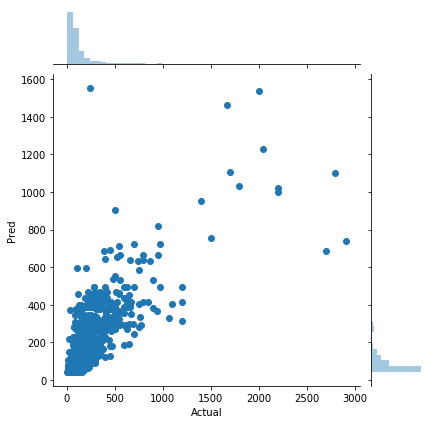

In [202]:
sns.jointplot(x='Actual',y='Pred',data=gr2_df)
plt.show()

In [193]:
import statsmodels.formula.api as smf

In [197]:
lm = smf.ols('price~area_type+availability+size+total_sqft+bath+balcony',train_data).fit()

In [200]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     590.4
Date:                Sat, 12 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:11:58   Log-Likelihood:                -83978.
No. Observations:               13320   AIC:                         1.680e+05
Df Residuals:                   13313   BIC:                         1.680e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -32.7147      4.369     -7.488   

In [206]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,3,11,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00


In [207]:
new_df = train_data.drop('society',axis=1)

In [208]:
new_df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,2,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,3,11,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00


In [210]:
new_df['location'].value_counts()

In [212]:
new_df['location'] = LabelEncoder().fit_transform(new_df['location'].values)

In [223]:
new_df['location'].describe()

count    13320.000000
mean       672.639039
std        364.997484
min          0.000000
25%        397.000000
50%        654.000000
75%        999.000000
max       1304.000000
Name: location, dtype: float64

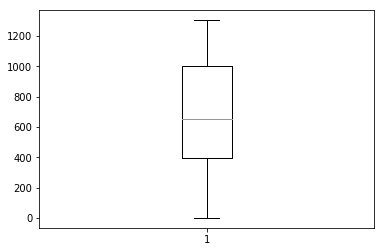

In [222]:
plt.boxplot(new_df['location'])
plt.show()

In [213]:
new_df.dtypes

area_type         int64
availability      int64
location          int64
size              int32
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [214]:
train,test = train_test_split(new_df,test_size = .33,random_state = 100)

In [215]:
xtrain = train.drop('price',axis=1)
xtest = test.drop('price',axis=1)

ytrain = train['price']
ytest = test['price']

In [216]:
mod = RandomForestRegressor()
mod.fit(xtrain,ytrain)

pred_rf3 = mod.predict(xtest)
pred_rf3[:5]

array([46.21466667, 40.52808333, 50.3       , 31.095     , 83.4       ])

In [217]:
mod_df =pd.DataFrame({'Actual':ytest,'Predict':pred_rf3})
mod_df.head(5)

,Actual,Predict
8296,46.79,46.214667
2671,72.00,40.528083
4090,35.00,50.300000
11737,45.00,31.095000
9770,94.00,83.400000


In [218]:
mse_mod = mean_squared_error(ytest,pred_rf3)
mse_mod

8982.151715087924

In [219]:
rmse_mod = np.sqrt(mse_mod)
rmse_mod

94.7742143997402

In [220]:
r2_mod = r2_score(ytest,pred_rf3)
r2_mod

0.558395306895332

In [ ]:
mod = RandomForestRegressor()
mod.fit(xtrain,ytrain)

pred_rf3 = mod.predict(xtest)
pred_rf3[:5]

In [224]:
test_data = pd.read_csv("D:/Second_Sem/Second_Sem/Self_Prac/MachineHack/houseprice/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [225]:
test_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [227]:
test_data.drop('price',axis=1,inplace=True)

In [231]:
test_data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [281]:
test_data['bath'].fillna(0,inplace=True)
test_data['balcony'].fillna(0,inplace=True)
test_data['size'].fillna(0,inplace=True)

In [230]:
test_data['society'].fillna(method = 'ffill',inplace=True)
test_data['location'].fillna(method = 'ffill',inplace=True)

In [232]:
test_data['area_type'] = test_data['area_type'].replace({'Super built-up  Area':1})

In [233]:
test_data['area_type'] = test_data['area_type'].replace({'Built-up  Area':2,'Plot  Area':3,'Carpet  Area':4})

In [234]:
test_data['location'] = LabelEncoder().fit_transform(test_data['location'].values)

In [235]:
test_data['society'] = LabelEncoder().fit_transform(test_data['society'].values)

In [238]:
test_data['availability']=test_data.availability.str[:2].apply(ready)

In [239]:
test_data['size'] = test_data['size'].str.replace('[^0-9]',' ')

In [243]:
test_data.shape

(1480, 8)

In [249]:
test_data['total_sqft'].value_counts()

1200       97
1500       33
2400       28
1000       27
600        20
1350       19
1100       19
1150       16
1050       14
1650       14
1400       13
2000       12
1600       12
900        11
1225       11
1800       10
1245        9
1080        9
950         9
1700        9
1750        8
800         8
1250        8
1300        8
4000        8
1610        7
1180        7
750         7
1450        7
700         7
2200        7
2500        7
1140        6
1230        6
1210        6
3000        6
1170        6
1290        6
1120        6
1580        5
1160        5
1090        5
1105        5
1095        5
525         5
1410        5
1560        5
1550        5
1240        5
3500        5
1265        5
1320        5
1345        5
1035        4
920         4
1260        4
960         4
1130        4
1360        4
2100        4
1275        4
1175        4
1197        4
1285        4
1070        4
1920        4
1305        4
1020        4
1314        4
1280        4
1025        4
2800  

In [248]:
test_data['total_sqft'] = test_data['total_sqft'].replace({'534 - 763':648,'1741 - 2074':1907,'1892 - 2798':2345,'530 - 575':552,
                                                          '1160 - 1260':1210,'475 - 1058.27':767,'1200 - 2000':1600,'2563 - 3914':3238,
                                                          '600 - 4000':2300,'524 - 894':709,'660 - 690':675,'100Sq. Meter':1076,'2830 - 2882':2856,
                                                          '1152 - 1197':1175,'700 - 800':750,'5Acres':217800,'1498 - 1523':1510,'1975 - 2289':2132,
                                                          '3307 - 3464':3385,'1691 - 2170':1930,'2695 - 2940':2818,'1165 - 1225':1195})

In [255]:
test_data['total_sqft'] = test_data['total_sqft'].astype(float)

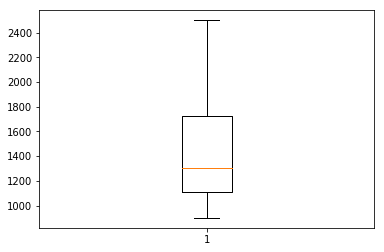

In [259]:
plt.boxplot(test_data['total_sqft'])
plt.show()

In [258]:
test_data['total_sqft'] = test_data['total_sqft'].clip_upper(test_data['total_sqft'].quantile(0.90))
test_data['total_sqft'] = test_data['total_sqft'].clip_lower(test_data['total_sqft'].quantile(.1))

In [265]:
test_data.dtypes

area_type         int64
availability      int64
location          int64
size            float64
society           int64
total_sqft      float64
bath            float64
balcony         float64
dtype: object

In [264]:
test_data['size'] = test_data['size'].astype(float)

In [266]:
test_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,1,11,95,2.0,404,1225.0,2.0,2.0
1,3,11,30,9.0,404,2400.0,9.0,2.0


In [282]:
test_data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
dtype: int64

In [283]:
gr1_model = GradientBoostingRegressor(n_estimators=500,min_samples_split=10,max_depth=5,loss='huber')
gr1_model.fit(train_x,train_y)

gr1_pred = gr1_model.predict(test_data)
gr1_pred[:5]

array([ 58.12430612, 493.29255364, 300.05551891,  61.88102699,
        51.81509152])

In [284]:
answer=pd.DataFrame(gr1_pred)

In [286]:
answer=answer.rename(columns={0:'price'})

In [287]:
answer.head()

,price
0,58.124306
1,493.292554
2,300.055519
3,61.881027
4,51.815092


In [289]:
!pip install XlsxWriter


In [290]:
writer = pd.ExcelWriter('example.xlsx', engine='xlsxwriter')


In [291]:
answer.to_excel(writer, 'Sheet1')


In [292]:
writer.save()